<a href="https://colab.research.google.com/github/jhumala45/CIS-4170-Group-7-Project/blob/main/CIS4170_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import requests
import seaborn as sns
import matplotlib.dates as mdates

# Set styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
# Upload and read dataset
df = pd.read_csv("/content/Air_Traffic_Passenger_Statistics.csv")
df

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2025/04/20 01:01:07 PM,2025/04/22 03:02:20 PM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2025/04/20 01:01:08 PM,2025/04/22 03:02:20 PM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2025/04/20 01:01:08 PM,2025/04/22 03:02:20 PM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2025/04/20 01:01:08 PM,2025/04/22 03:02:20 PM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2025/04/20 01:01:08 PM,2025/04/22 03:02:20 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37677,202502,2025/02/01,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,5061,2025/04/20 01:01:09 PM,2025/04/22 03:02:20 PM
37678,202502,2025/02/01,WestJet,WS,WestJet,WS,International,Canada,Deplaned,Other,International,A,2092,2025/04/20 01:01:09 PM,2025/04/22 03:02:20 PM
37679,202502,2025/02/01,WestJet,WS,WestJet,WS,International,Canada,Enplaned,Other,International,A,2154,2025/04/20 01:01:09 PM,2025/04/22 03:02:20 PM
37680,202502,2025/02/01,ZIPAIR Tokyo Inc,ZG,ZIPAIR Tokyo Inc,ZG,International,Asia,Deplaned,Other,International,A,6162,2025/04/20 01:01:09 PM,2025/04/22 03:02:20 PM


In [4]:
# Data Cleaning
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert 'activity_period' to datetime (format: YYYYMM → YYYY-MM)
df['activity_period'] = pd.to_datetime(df['activity_period'].astype(str), format='%Y%m')

# Drop rows with missing key values
df = df.dropna(subset=['operating_airline', 'passenger_count', 'activity_period'])

# Convert passenger_count to integers
df['passenger_count'] = df['passenger_count'].astype(int)

# Preview cleaned dataset
df.head()

,activity_period,activity_period_start_date,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,data_as_of,data_loaded_at
0,1999-07-01,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2025/04/20 01:01:07 PM,2025/04/22 03:02:20 PM
1,1999-07-01,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2025/04/20 01:01:08 PM,2025/04/22 03:02:20 PM
2,1999-07-01,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2025/04/20 01:01:08 PM,2025/04/22 03:02:20 PM
3,1999-07-01,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2025/04/20 01:01:08 PM,2025/04/22 03:02:20 PM
4,1999-07-01,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2025/04/20 01:01:08 PM,2025/04/22 03:02:20 PM


In [19]:
print(df.columns.tolist())

['activity_period', 'activity_period_start_date', 'operating_airline', 'operating_airline_iata_code', 'published_airline', 'published_airline_iata_code', 'geo_summary', 'geo_region', 'activity_type_code', 'price_category_code', 'terminal', 'boarding_area', 'passenger_count', 'data_as_of', 'data_loaded_at']


**VISUALIZATIONS**

<Figure size 1400x600 with 0 Axes>

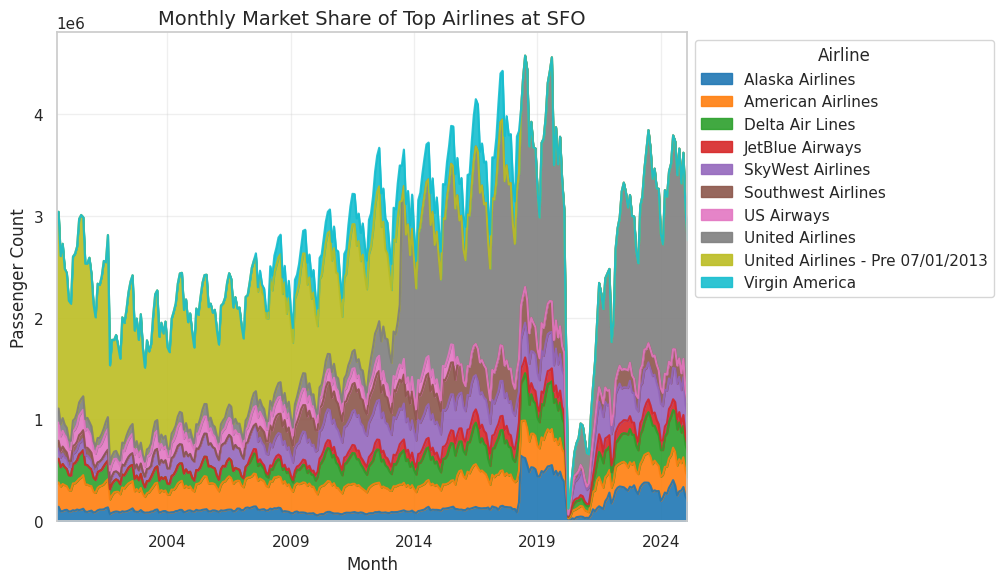

<Figure size 1400x600 with 0 Axes>

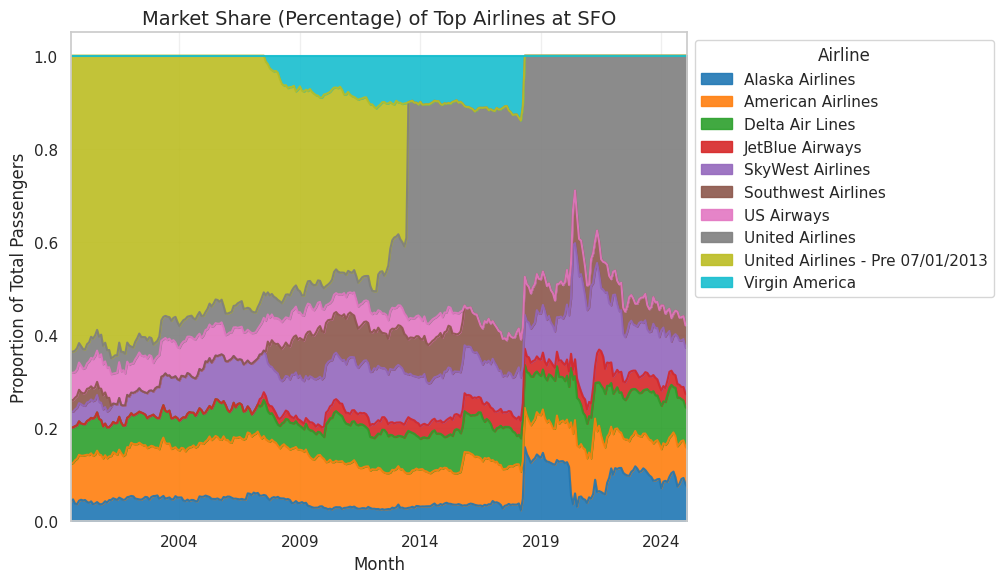

In [22]:
# Step 1: Convert date column and clean column names
df['activity_period'] = pd.to_datetime(df['activity_period'], errors='coerce')
df = df.rename(columns={
    'Operating Airline': 'operating_airline',
    'Passenger Count': 'passenger_count'
})

# Step 2: Drop rows with missing values in important columns
df = df.dropna(subset=['activity_period', 'operating_airline'])

# Step 3: Identify top 10 airlines by total passenger volume
top_airlines = df.groupby('operating_airline')['passenger_count'].sum().nlargest(10).index
df_top = df[df['operating_airline'].isin(top_airlines)]

# Step 4: Group by month and airline, then pivot
monthly_summary = df_top.groupby(['activity_period', 'operating_airline'])['passenger_count'].sum().reset_index()
pivot_df = monthly_summary.pivot(index='activity_period', columns='operating_airline', values='passenger_count').fillna(0)

# Step 5: Plot the stacked area chart - Absolute Passenger Count
plt.figure(figsize=(14, 6))
pivot_df.plot.area(stacked=True, cmap='tab10', alpha=0.9)
plt.title("Monthly Market Share of Top Airlines at SFO", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Passenger Count")
plt.grid(alpha=0.3)
plt.legend(title="Airline", loc='upper left', bbox_to_anchor=(1.0, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# Step 6: Plot the stacked area chart - Percentage Market Share
pivot_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0)

plt.figure(figsize=(14, 6))
pivot_percent.plot.area(stacked=True, cmap='tab10', alpha=0.9)
plt.title("Market Share (Percentage) of Top Airlines at SFO", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Proportion of Total Passengers")
plt.grid(alpha=0.3)
plt.legend(title="Airline", loc='upper left', bbox_to_anchor=(1.0, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()